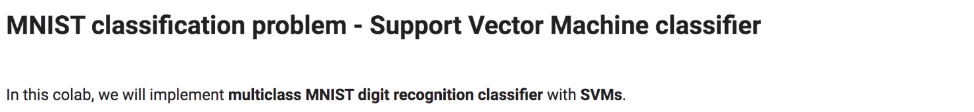

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pandas.plotting import scatter_matrix

In [28]:
from keras.datasets import mnist

from sklearn.svm import SVC

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.pipeline import Pipeline

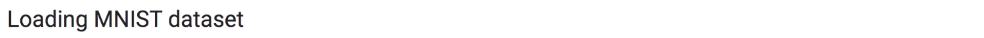

In [29]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
print('Shape of trainning data:', X_train.shape)
print('Shape of trainning labels:', y_train.shape)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

Shape of trainning data: (60000, 28, 28)
Shape of trainning labels: (60000,)
Shape of testing data: (10000, 28, 28)
Shape of testing labels: (10000,)


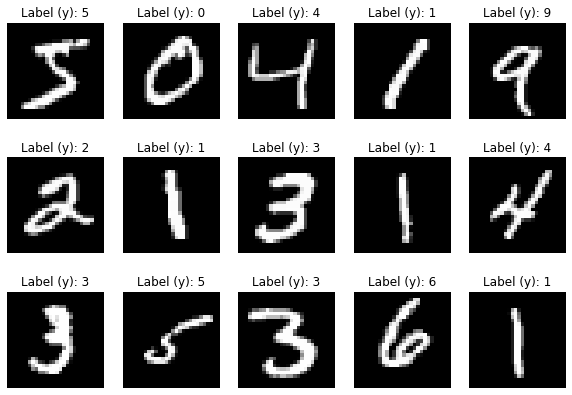

In [31]:
fig = plt.figure(figsize=(10,7))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1) 
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label (y): {y}'.format(y=y_train[i]))
    ax.set_axis_off()

In [32]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalize
X_train = X_train/255
X_test = X_test/255

In [33]:
print('Shape of training data after flattening:', X_train.shape)
print('Shape of test data after flattening:', X_test.shape)

Shape of training data after flattening: (60000, 784)
Shape of test data after flattening: (10000, 784)


In [34]:
X_train = X_train[0:10000, :]
y_train = y_train[0:10000]
X_test = X_test[0:2000, :]
y_test = y_test[0:2000]

In [35]:
print('Shape of training data :', X_train.shape)
print('Shape of training labels:', y_train.shape)

print('Shape of test data:', X_test.shape)
print('Shape of test lebels:', y_test.shape)

Shape of training data : (10000, 784)
Shape of training labels: (10000,)
Shape of test data: (2000, 784)
Shape of test lebels: (2000,)


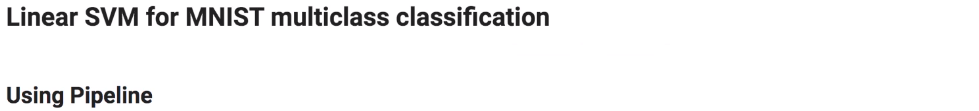

In [36]:
pipe_l = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC(kernel='linear', C=1)),
])

pipe_l.fit(X_train, y_train.ravel())

# Evaluate the model using cross-validation
acc = cross_val_score(pipe_l, X_train, y_train.ravel(), cv=2)
print('Training Accuracy: {:.2f} %'.format(acc.mean()*100))

Training Accuracy: 91.07 %


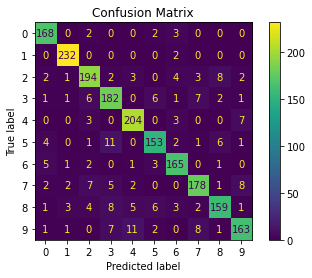

In [37]:
# visualizing the confusion matrix
y_pred = pipe_l.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [38]:
CR = classification_report(y_test, y_pred)
print('Classification Report \n')
print(CR)

Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.85      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.85      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.87      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



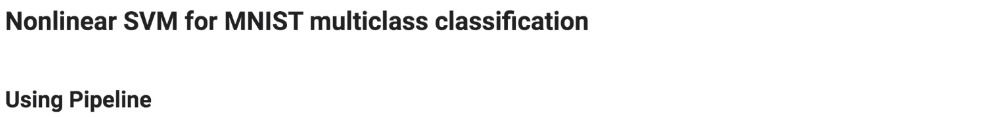

In [13]:
pipe_nl = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC(kernel='rbf', gamma=0.1, C=1)),
])

pipe_nl.fit(X_train, y_train.ravel())

# Evaluate the model using cross-validation
acc = cross_val_score(pipe_nl, X_train, y_train.ravel(), cv=2)
print('Training Accuracy: {:.2f} %'.format(acc.mean()*100))

Training Accuracy: 82.87 %


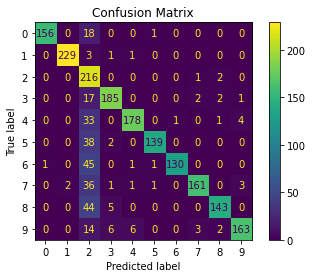

In [14]:
# visualizing the confusion matrix
y_pred = pipe_nl.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [15]:
CR = classification_report(y_test, y_pred)
print('Classification Report \n')
print(CR)

Classification Report 

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.47      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.73      0.84       178
           7       0.96      0.79      0.87       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000



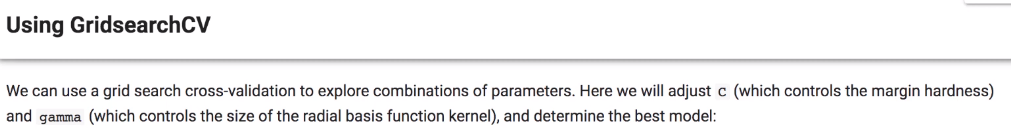

In [26]:
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(
    gamma=gamma_range,
    C=C_range
)

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train.ravel())

print('The best parameters are %s with a score of %0.2f'%(grid.best_params_, grid.best_score_))

In [22]:
print('The best parameters are %s with a score of %0.2f'%(grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 0.001} with a score of 0.95


## Training Pipeline using best parameters

In [23]:
pipe_best = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC(kernel='rbf', gamma=0.001, C=10)),
])

pipe_best.fit(X_train, y_train.ravel())

# Evaluate the model using cross-validation
acc = cross_val_score(pipe_best, X_train, y_train.ravel(), cv=2)
print('Training Accuracy: {:.2f} %'.format(acc.mean()*100))

Training Accuracy: 92.62 %


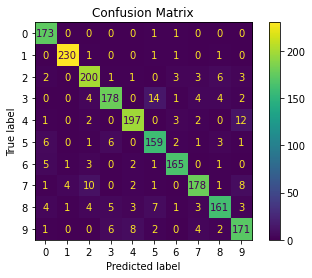

In [24]:
# visualizing the confusion matrix
y_pred = pipe_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [25]:
CR = classification_report(y_test, y_pred)
print('Classification Report \n')
print(CR)

Classification Report 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       175
           1       0.97      0.98      0.98       234
           2       0.89      0.91      0.90       219
           3       0.91      0.86      0.88       207
           4       0.92      0.91      0.92       217
           5       0.85      0.89      0.87       179
           6       0.93      0.93      0.93       178
           7       0.91      0.87      0.89       205
           8       0.90      0.84      0.87       192
           9       0.85      0.88      0.87       194

    accuracy                           0.91      2000
   macro avg       0.90      0.91      0.90      2000
weighted avg       0.91      0.91      0.91      2000

